<a href="https://colab.research.google.com/github/Tejaswidarsi/ML-5/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imported Required Libraries

In [91]:
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


###a. Load the Dataset

In [102]:
def load_iris_data():
    data = []
    with open('/content/iris (1).csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        for row in reader:
            features = list(map(float, row[:-1]))
            label = row[-1]
            data.append((features, label))
    return data

###b.Split the dataset into training and testing sets

In [94]:
def split_dataset(data, test_size=0.3):
    random.shuffle(data)
    split_idx = int(len(data) * (1 - test_size))
    train_data = data[:split_idx]
    test_data = data[split_idx:]
    return train_data, test_data

**# 3. Calculate Euclidean distance**

In [95]:
def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

In [69]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

## Evaluating the KNN Model with Different Values of k


c. Test your model using test set. Find accuracy and confusion Matrix.

In [96]:
def knn(train_data, test_point, k):
    # Calculate distance between test_point and all training data
    distances = [(euclidean_distance(test_point[0], train_point[0]), train_point[1]) for train_point in train_data]
    distances.sort(key=lambda x: x[0])  # Sort by distance
    # Get the labels of the K-nearest neighbors
    neighbors = [distances[i][1] for i in range(k)]
    # Return the most common class label among neighbors
    return Counter(neighbors).most_common(1)[0][0]

For each test point, it:
Predicts its label using the K-NN algorithm.
Compares it to the actual label.
Updates the confusion matrix and correct count accordingly.
Returns:
Accuracy: Ratio of correctly classified points to the total test set.
Confusion matrix: Tracks actual vs. predicted labels.
Labels: Unique labels used for confusion matrix organization.

In [97]:
def accuracy_and_confusion_matrix(train_data, test_data, k):
    correct = 0
    confusion_matrix = Counter()
    labels = sorted(set([sample[1] for sample in train_data]))
    for test_point in test_data:
        predicted_label = knn(train_data, test_point, k)
        actual_label = test_point[1]
        if predicted_label == actual_label:
            correct += 1
        confusion_matrix[(actual_label, predicted_label)] += 1
    accuracy = correct / len(test_data)
    return accuracy, confusion_matrix, labels

In [98]:
def evaluate_k(train_data, test_data, max_k=10):
    accuracies = []
    for k in range(1, max_k+1):
        accuracy, _, _ = accuracy_and_confusion_matrix(train_data, test_data, k)
        accuracies.append((k, accuracy))
    return accuracies

###d. Examining the effect of the value of K on accuracy
k_values = range(1, 21)

###Plotting the curve: K vs Accuracy

In [99]:
def plot_k_vs_accuracy(accuracies):
    k_values = [k for k, _ in accuracies]
    acc_values = [acc for _, acc in accuracies]
    plt.plot(k_values, acc_values, marker='o')
    plt.title('K vs Accuracy')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

The code starts by loading the Iris dataset and splitting it into a training set and a testing set, with 70% for training and 30% for testing. It then uses the K-NN classifier to predict labels for the test set with K=3 and calculates the accuracy. The confusion matrix is printed, showing the comparison between the actual and predicted labels for the test set. Finally, the results display both the accuracy percentage and the organized confusion matrix.

In [103]:
if __name__ == "__main__":
    # Load dataset
    data = load_iris_data()

    # Split dataset into 70% train and 30% test
    train_data, test_data = split_dataset(data, test_size=0.3)

    # Test for K=3
    k = 3
    accuracy, confusion_matrix, labels = accuracy_and_confusion_matrix(train_data, test_data, k)

    print(f"Accuracy for K={k}: {accuracy * 100:.2f}%")
    print("\nConfusion Matrix:")
    print(f"{' ':<12}{'Predicted':<12}")
    for actual in labels:
        row = f"{actual:<12}"
        for predicted in labels:
            row += f"{confusion_matrix[(actual, predicted)]:<12}"
        print(row)


Accuracy for K=3: 97.78%

Confusion Matrix:
            Predicted   
setosa      8           0           0           
versicolor  0           22          0           
virginica   0           1           14          


###Finding the value of K with the maximum accuracy


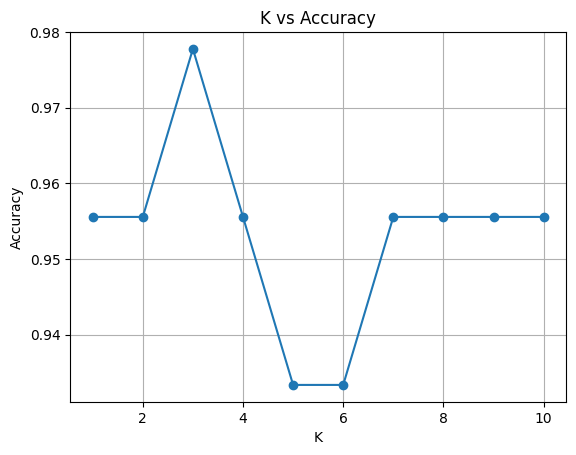


Best K: 3 with Accuracy: 97.78%


In [105]:
accuracies = evaluate_k(train_data, test_data, max_k=10)

    # Plot K vs Accuracy

plot_k_vs_accuracy(accuracies)

    # Find the best K value for maximum accuracy
best_k, best_acc = max(accuracies, key=lambda x: x[1])
print(f"\nBest K: {best_k} with Accuracy: {best_acc * 100:.2f}%")